In [63]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


results_path = "../../../experiments/12-05-2025"
# folders = [folder for folder in os.listdir(
#     results_path) if os.path.isdir(os.path.join(results_path, folder))]
# datasets = set([name.split('-')[-1].replace('.csv', '') for name in folders])
# datasets

In [64]:
algorithms = ["fdx", "pyro"]
datasets = [
    "abalone",
    "adult",
    "bridges",
    "echocardiogram",
    "iris",
    "letter",
    "ncvoter",
]

In [65]:


fds_results = {}

for dataset in datasets:
    for algorithm in algorithms:
        folder_name = f"{algorithm}-{dataset}"

        # if algorithm == "fdx":
            
        #     folder_name = f"{algorithm}-{dataset}"
        #     print(folder_name)
        # else:
        #     folder_name = f"{algorithm}-{dataset}.csv"
        #     print(folder_name)
        

        folder_path = os.path.join(results_path, folder_name)
        file_path = os.path.join(folder_path, f"{algorithm}-{dataset}.csv")

        print(file_path)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            fds_results[(algorithm, dataset)] = df
            # print(df.columns)
            # print(folder_path, '\t' ,file_path)


../../../experiments/12-05-2025/fdx-abalone/fdx-abalone.csv
../../../experiments/12-05-2025/pyro-abalone/pyro-abalone.csv
../../../experiments/12-05-2025/fdx-adult/fdx-adult.csv
../../../experiments/12-05-2025/pyro-adult/pyro-adult.csv
../../../experiments/12-05-2025/fdx-bridges/fdx-bridges.csv
../../../experiments/12-05-2025/pyro-bridges/pyro-bridges.csv
../../../experiments/12-05-2025/fdx-echocardiogram/fdx-echocardiogram.csv
../../../experiments/12-05-2025/pyro-echocardiogram/pyro-echocardiogram.csv
../../../experiments/12-05-2025/fdx-iris/fdx-iris.csv
../../../experiments/12-05-2025/pyro-iris/pyro-iris.csv
../../../experiments/12-05-2025/fdx-letter/fdx-letter.csv
../../../experiments/12-05-2025/pyro-letter/pyro-letter.csv
../../../experiments/12-05-2025/fdx-ncvoter/fdx-ncvoter.csv
../../../experiments/12-05-2025/pyro-ncvoter/pyro-ncvoter.csv


In [66]:
headers = [df.columns.tolist() for df in fds_results.values()]
distinct_headers = set(header for sublist in headers for header in sublist)
print("Headers:", distinct_headers)



Headers: {'dataset', 'lhs_uniqueness', 'fd', 'rfi_prime_plus', 'lhs_size', 'algorithm', 'g3_prime', 'is_key', 'mu_plus'}


In [70]:

metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

global_df = pd.DataFrame(columns=["algorithm", "dataset", "lhs_size"])

for (algo, dataset), df in fds_results.items():
    if "fd" in df.columns:
        # Create a temporary dataframe with just the metrics that exist in this df
        available_metrics = [m for m in metrics if m in df.columns]
        if not available_metrics:
            continue
            
        temp_df = df[available_metrics].copy()
        
        # Calculate LHS size based on 'fd' structure
        temp_df["lhs_size"] = df["fd"].str.split("->").str[0].str.count(",") + 1
        
        # Add identifying columns
        temp_df["algorithm"] = algo
        temp_df["dataset"] = dataset
        
        # Append to the global DataFrame
        global_df = pd.concat([global_df, temp_df], ignore_index=True)

# Check for correct dataset values
global_df[(global_df['algorithm'] == 'fdx') & (global_df['dataset'] == 'ncvoter')]

,algorithm,dataset,lhs_size,rfi_prime_plus,mu_plus,g3_prime
9930,fdx,ncvoter,1,1.000000,0.000000,1.000000
9931,fdx,ncvoter,2,1.000000,0.000000,1.000000
9932,fdx,ncvoter,3,1.000000,0.000000,1.000000
9933,fdx,ncvoter,2,0.980955,0.000000,0.993964
9934,fdx,ncvoter,2,0.030476,0.004299,0.154472
9935,fdx,ncvoter,1,0.009377,0.003379,0.015449
9936,fdx,ncvoter,1,1.000000,1.000000,1.000000
9937,fdx,ncvoter,2,0.714197,0.737697,0.738095
9938,fdx,ncvoter,1,0.058619,0.003943,0.042126


/tmp/ipykernel_31492/4123828295.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_31492/4123828295.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_31492/4123828295.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


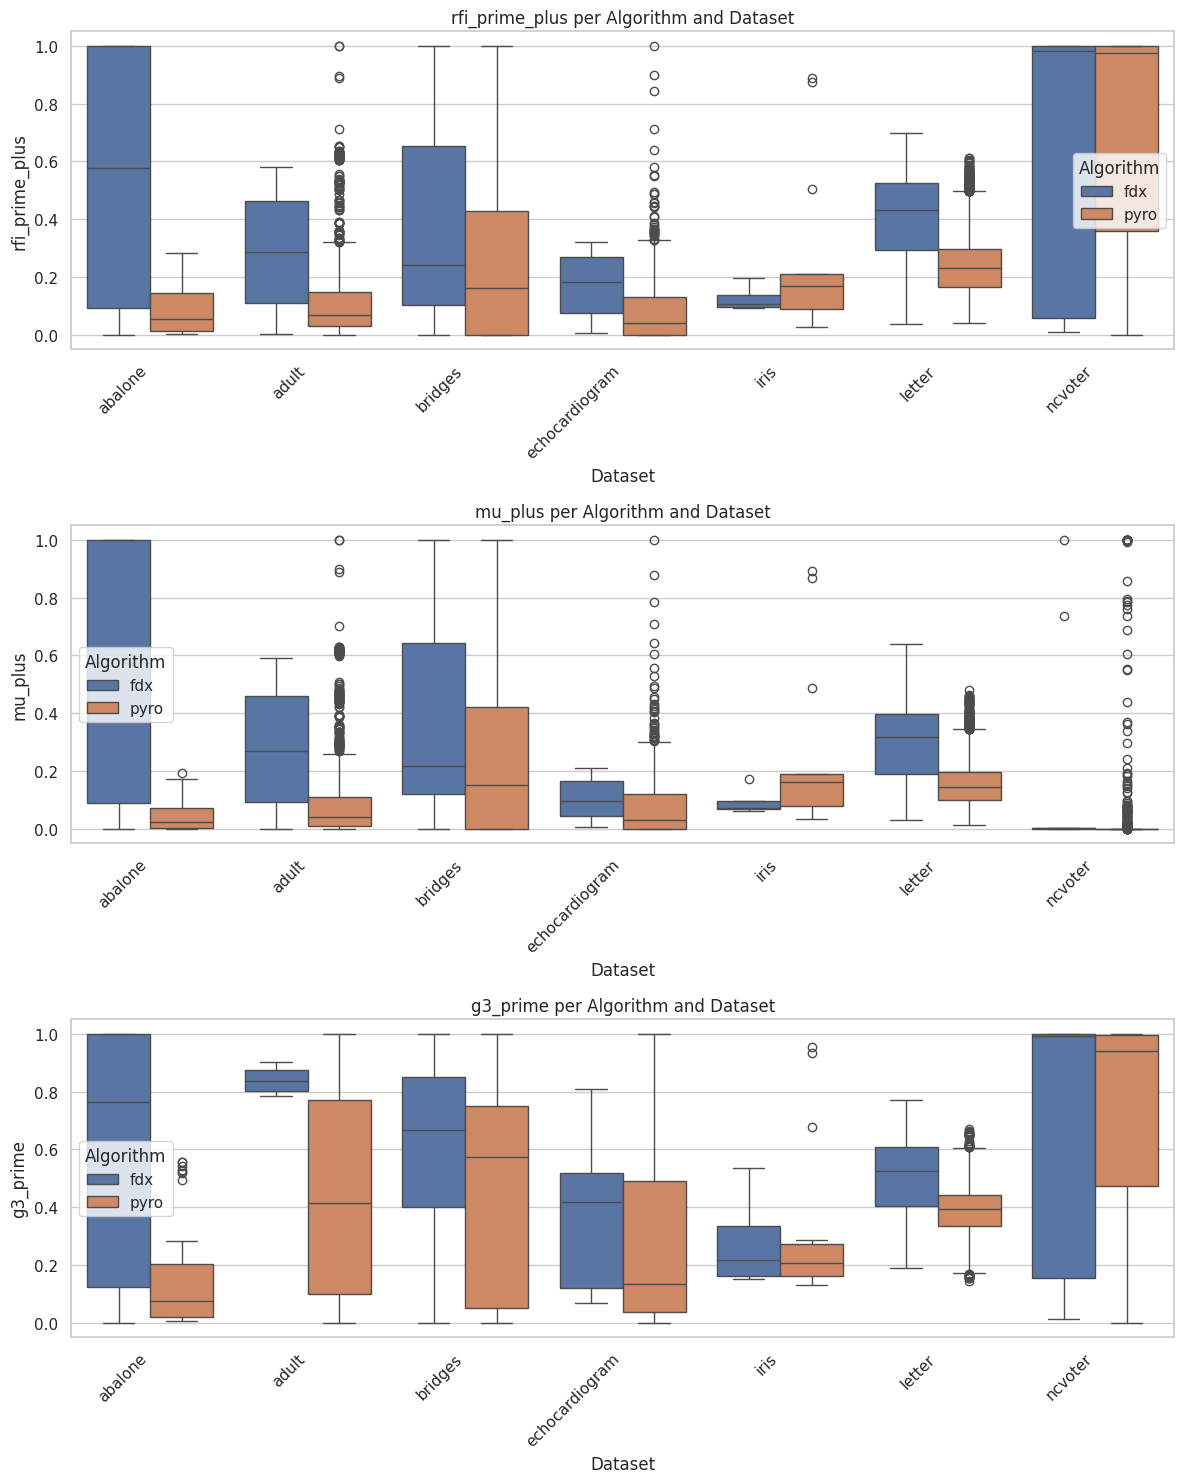

In [68]:
metrics = ["rfi_prime_plus", "mu_plus", "g3_prime"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, metric_name in enumerate(metrics):
    sns.boxplot(
        data=global_df,
        x='dataset',
        y=metric_name,
        hue='algorithm',
        ax=axes[i]
    )
    
    # Set appropriate titles and labels
    axes[i].set_title(f'{metric_name} per Algorithm and Dataset')
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(metric_name)
    axes[i].legend(title='Algorithm')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()